# Get a dose plane 2D from 3D given a z coordinate

In [3]:
from Dosepy.bed import load_dose
import SimpleITK as sitk

In [39]:
dose = load_dose(path_to_file = "/media/luis/TOMO/Dosepy/Hombro20en1/RD_3D_arc1y2.dcm")
print(dose.GetSize())
print(dose.GetOrigin())

reference_img = sitk.Image(
    dose.GetSize()[0],
    dose.GetSize()[1],
    1,
    sitk.sitkFloat32
)

dose_origin = dose.GetOrigin()
print(dose_origin)

reference_img.SetOrigin((dose_origin[0], dose_origin[1], 1))

print(reference_img.GetOrigin())

(102, 90, 60)
(-92.9, -328.3, -59.0)
(-92.9, -328.3, -59.0)
(-92.9, -328.3, 1.0)


In [ ]:
interpolator = sitk.sitkLinear
identity = sitk.Transform(3, sitk.sitkIdentity)
#identity = identity.GetInverse()

interpolated_dose = sitk.Resample(
    dose,
    reference_img,
    identity,
    interpolator,
    100
)

dose.GetSpacing()

(2.0, 2.0, 2.0)

In [63]:
dose.GetSize()

(102, 90, 60)

In [64]:
interpolated_dose.GetSize()

(102, 90, 1)

In [44]:
import matplotlib.pyplot as plt

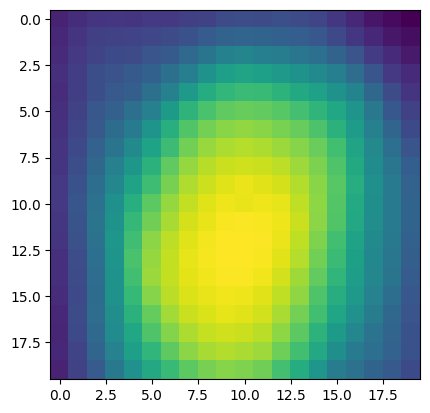

In [65]:
plt.imshow(sitk.GetArrayFromImage(dose[40:60,40:60,30]))

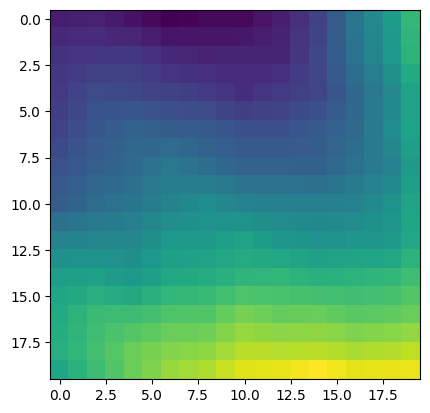

In [66]:
plt.imshow(sitk.GetArrayFromImage(interpolated_dose[40:60, 40:60, 0]))